In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('podcast_data.csv')
df.tail()

,On Demand Downloads Download Date,On Demand Downloads Total Downloads
1398,2016-03-05,47369
1399,2016-03-04,63070
1400,2016-03-03,67143
1401,2016-03-02,62922
1402,2016-03-01,13321


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 2 columns):
On Demand Downloads Download Date      1403 non-null object
On Demand Downloads Total Downloads    1403 non-null int64
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [4]:
df = df.rename(columns={'On Demand Downloads Download Date': 'Date', 'On Demand Downloads Total Downloads': 'Downloads'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 2 columns):
Date         1403 non-null object
Downloads    1403 non-null int64
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index(df['Date'], drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1403 entries, 2020-01-02 to 2016-03-01
Data columns (total 2 columns):
Date         1403 non-null datetime64[ns]
Downloads    1403 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.9 KB


In [28]:
df.tail()

,Downloads
Date,
2016-03-05,47369
2016-03-04,63070
2016-03-03,67143
2016-03-02,62922
2016-03-01,13321


In [9]:
df.drop(labels='Date', axis=1, inplace=True)

/Users/charleneawillis/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


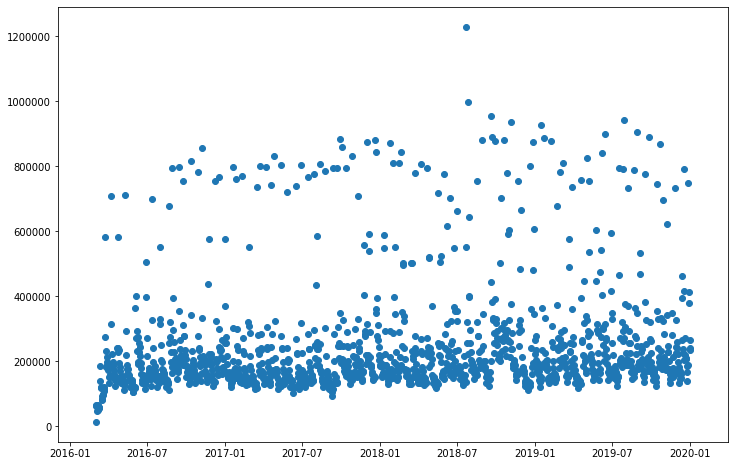

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(df.index, df.Downloads)

In [11]:
df.describe()

,Downloads
count,1.403000e+03
mean,2.460894e+05
std,1.715256e+05
min,1.332100e+04
25%,1.516510e+05
50%,1.865350e+05
75%,2.551595e+05
max,1.229566e+06


In [12]:
monthly = df.resample('m').sum()

In [13]:
monthly.head()

,Downloads
Date,
2016-03-31,4140645
2016-04-30,6299799
2016-05-31,5195723
2016-06-30,6524498
2016-07-31,6261218


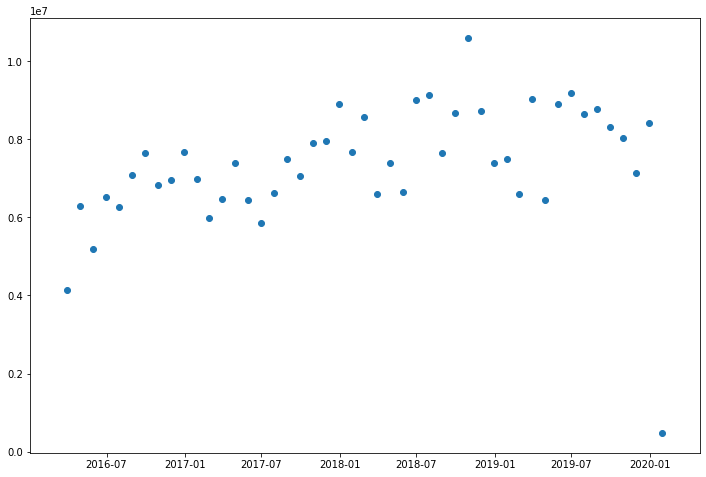

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(monthly.index, monthly.Downloads)

<Figure size 432x288 with 0 Axes>

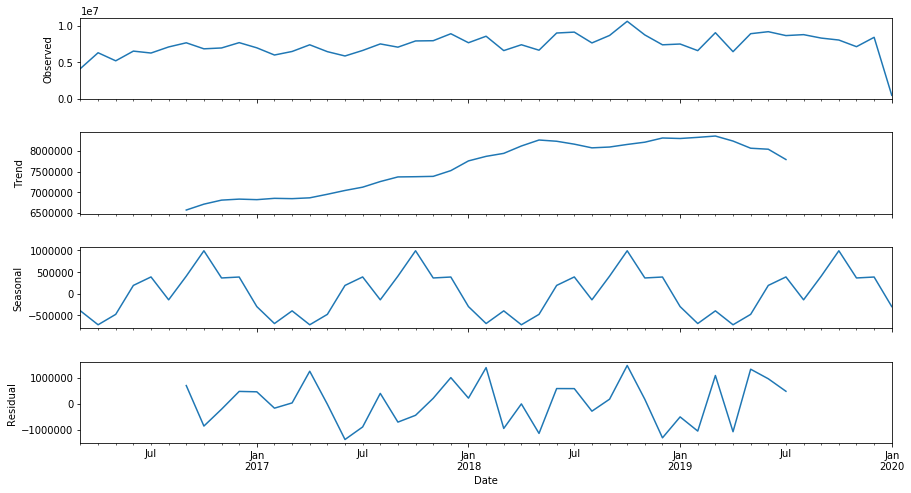

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

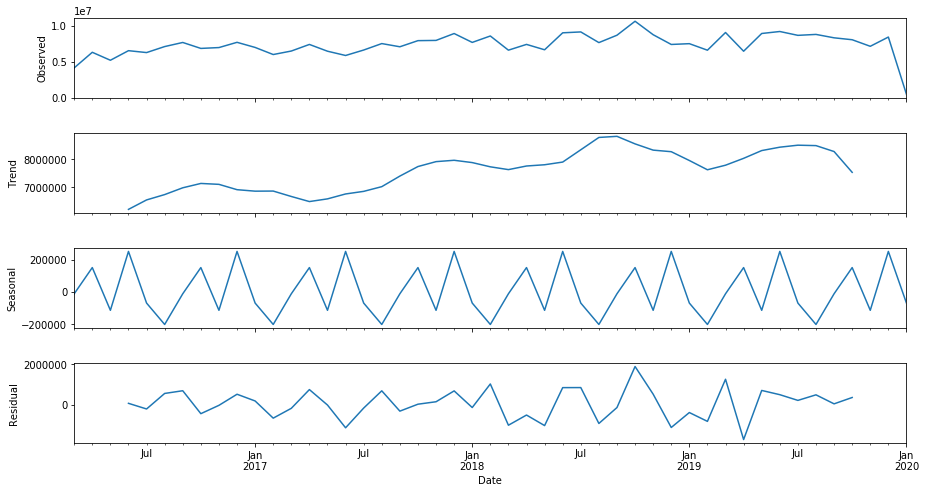

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(monthly, freq=6 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [25]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, ):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

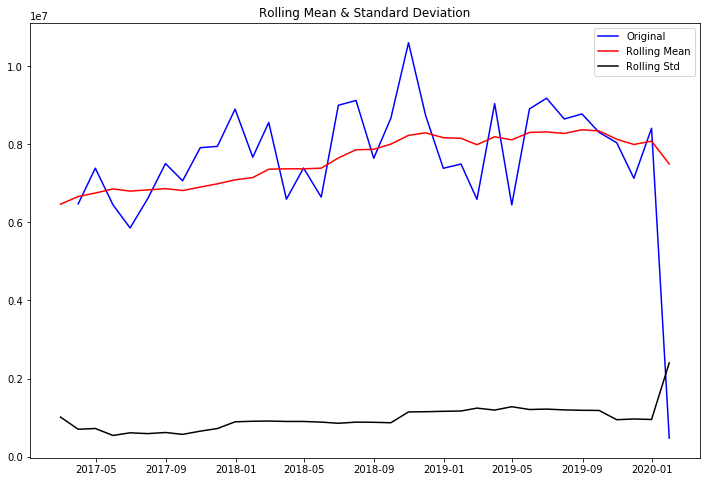

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [27]:
test_stationarity(monthly, 12)